In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('Zomato-data-.csv')
print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [38]:
display(df.head())

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [39]:
# Function to clean 'rate' column
def clean_rate_column(df):
    """Converts rate column to float and fills missing values with mean"""
    df = df.copy()  # Ensures modifications are made on a new copy
    df['rate'] = df['rate'].astype(str).str.split('/').str[0].astype(float, errors='ignore')
    df['rate'] = df['rate'].fillna(df['rate'].mean())  # Assign back instead of inplace
    return df

df = clean_rate_column(df)

display(df.head())

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


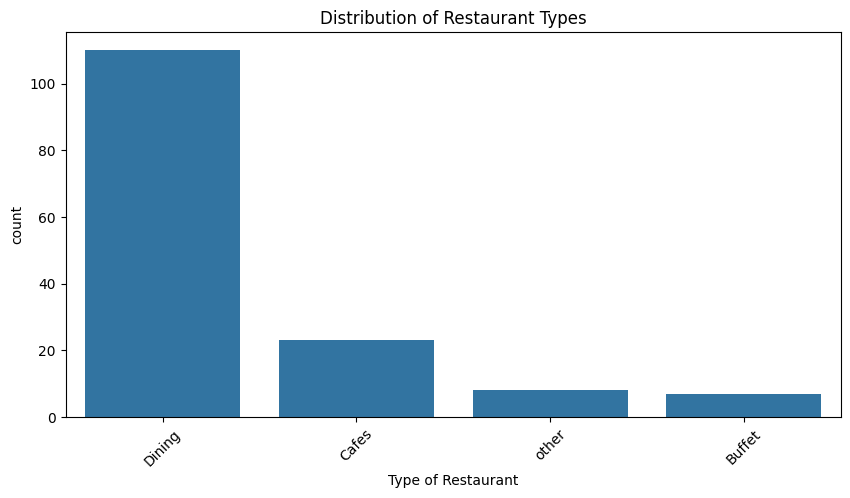

In [41]:
# Plotting the count of different types of restaurants
plt.figure(figsize=(10,5))
sns.countplot(x=df['listed_in(type)'], order=df['listed_in(type)'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Type of Restaurant")
plt.title("Distribution of Restaurant Types")
plt.show()

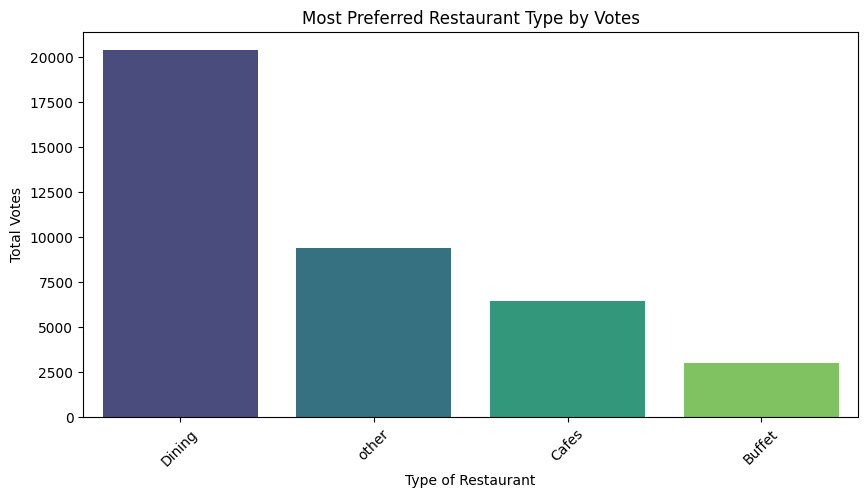

In [42]:
# Determining the most preferred type of restaurant based on votes
grouped_data = df.groupby('listed_in(type)', as_index=False)['votes'].sum()
grouped_data = grouped_data.sort_values(by='votes', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='listed_in(type)', y='votes', hue='listed_in(type)', data=grouped_data, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.title("Most Preferred Restaurant Type by Votes")
plt.show()

In [43]:
# Restaurant with maximum votes
max_votes = df['votes'].max()
resto_with_max_votes = df.loc[df['votes'] == max_votes, 'name'].values[0]
print(f"Restaurant with Maximum Votes: {resto_with_max_votes} ({max_votes} votes)\n")

Restaurant with Maximum Votes: Empire Restaurant (4884 votes)



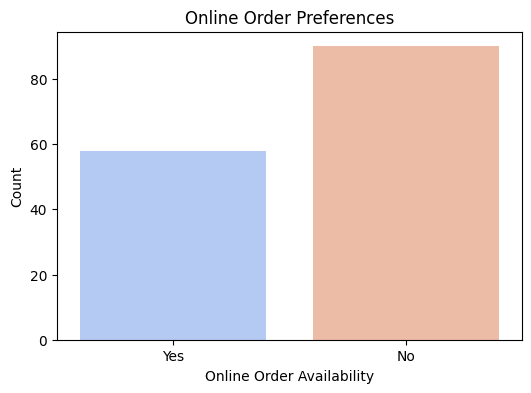

In [44]:
# Countplot for Online Orders
plt.figure(figsize=(6,4))
sns.countplot(x='online_order', data=df, palette='coolwarm', hue='online_order', legend=False)
plt.title("Online Order Preferences")
plt.xlabel("Online Order Availability")
plt.ylabel("Count")
plt.show()

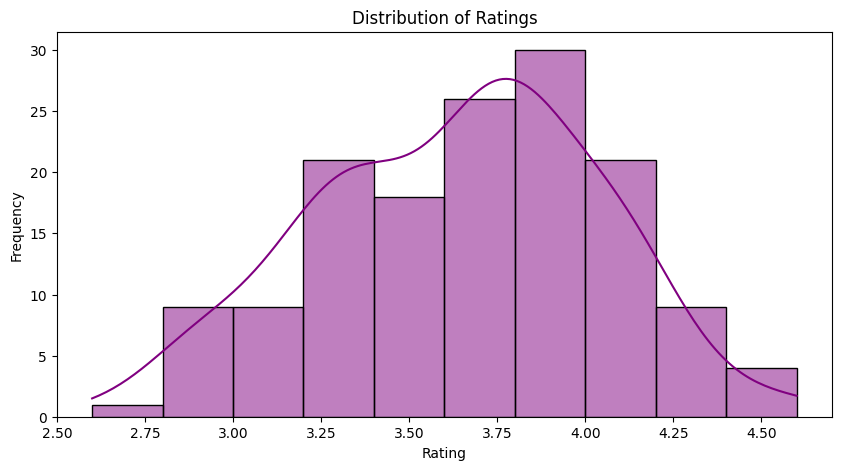

In [45]:
# Histogram of Ratings
plt.figure(figsize=(10,5))
sns.histplot(df['rate'], bins=10, kde=True, color='purple')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

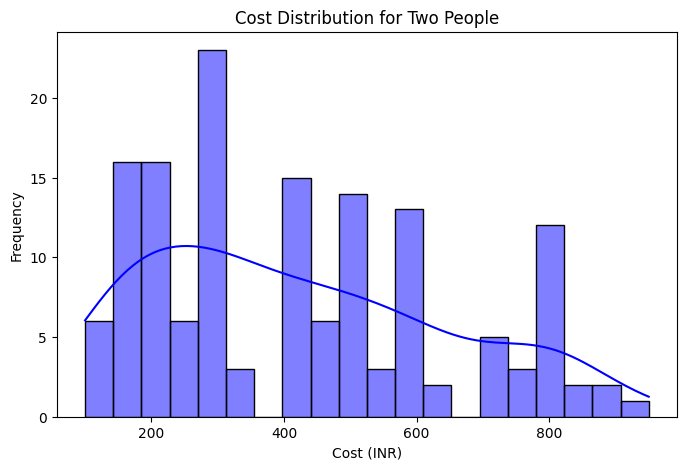

In [46]:
# Cleaning and Analyzing Cost Column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)
plt.figure(figsize=(8,5))
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True, color='blue')
plt.title("Cost Distribution for Two People")
plt.xlabel("Cost (INR)")
plt.ylabel("Frequency")
plt.show()

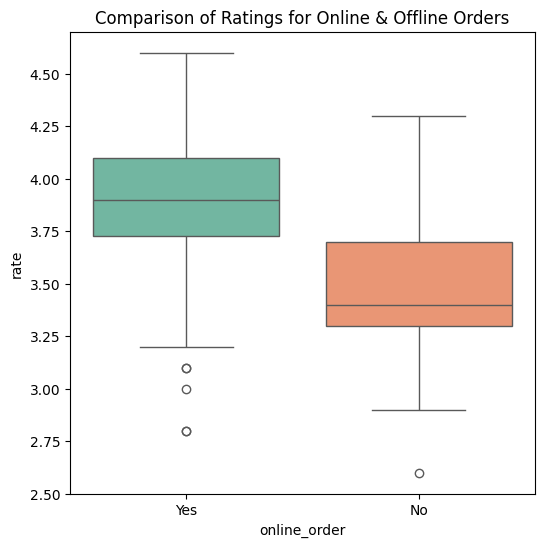

In [47]:
# Boxplot: Online vs Offline Ratings
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df, palette='Set2', hue='online_order', legend=False)
plt.title("Comparison of Ratings for Online & Offline Orders")
plt.show()

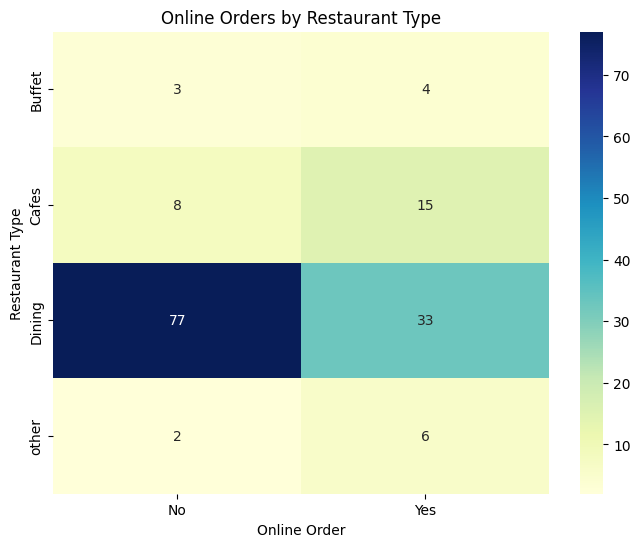

In [48]:
# Heatmap: Online Orders vs. Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Online Orders by Restaurant Type')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.xticks(rotation=0)
plt.show()

In [49]:
print("Analysis Completed Successfully!")

Analysis Completed Successfully!
